In [1]:
!pip install geopandas --upgrade
!pip install rasterio --upgrade
!pip install pyshp --upgrade
!pip install utm --upgrade
!pip install pygeos --upgrade
!pip install cartopy
#!pip uninstall rtree
!sudo apt install libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 29.2 MB/s 
     |████████████████████████████████| 6.3 MB 35.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 219 kB 5.1 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=7fe60943f504643f3bf8cd7dfc0d3b0f2c2f09754b22d89ef181a77d77e1b523
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6109 sha256=45212bc2853d82265d8b23e1c4adad415fea101145234b9095cef03b5ed5046b
  Stored in directory: /root/.cache/pip/wheels/a5/b0/12/7ee4fdb0f9fbb4157100bd02390436ed5d58ebfd3c6d6a0886
Successfully built utm
     |████████████████████████████████| 2.1 MB 5.2 MB/s 
     |████████████████████████████████| 10.8 MB 5.2 MB/s 
  Installing build dependencies ... done
  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.crs as ccrs

import geopandas as gpd
import rasterio as rio
from rasterio import mask as msk
import utm
import descartes
import shapefile
from shapely.geometry import Polygon
from shapely.geometry import Point, polygon
import pygeos
import rtree

from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Mounted at /content/drive


In [3]:
wyoming_boundaries = 'https://raw.githubusercontent.com/deldersveld/topojson/master/countries/us-states/WY-56-wyoming-counties.json'
texas_counties = 'Texas_County_Boundaries_Detailed.geojson'
gdf = gpd.read_file(wyoming_boundaries)
gdf.crs = "EPSG:4326"

In [4]:
msft_footprints = '/content/drive/MyDrive/Colab Notebooks/MSFT_Buildings/Wyoming.geojson'

In [5]:
gdf.crs = "EPSG:4326"
gdf.to_crs(4326)

,id,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,56,005,01605068,0500000US56005,56005,Campbell,06,12437852902,10357549,"POLYGON ((-106.02385 44.99740, -105.84712 44.9..."
1,None,56,017,01605074,0500000US56017,56017,Hot Springs,06,5190598635,5964358,"POLYGON ((-109.31281 43.81365, -109.09366 43.8..."
2,None,56,009,01605070,0500000US56009,56009,Converse,06,11020068482,26384811,"POLYGON ((-106.07863 43.49466, -106.01678 43.4..."
3,None,56,019,01609191,0500000US56019,56019,Johnson,06,10759203372,52947545,"POLYGON ((-107.37054 44.56004, -106.42856 44.5..."
4,None,56,007,01605069,0500000US56007,56007,Carbon,06,20454562375,172002531,"POLYGON ((-107.52429 42.26107, -107.52429 42.4..."
5,None,56,039,01605083,0500000US56039,56039,Teton,06,10349561687,570879628,"POLYGON ((-111.05538 44.66595, -110.66834 44.6..."
6,None,56,015,01605073,0500000US56015,56015,Goshen,06,5763721693,17580887,"POLYGON ((-104.65595 42.60872, -104.05330 42.6..."
7,None,56,001,01605066,0500000US56001,56001,Albany,06,11070466383,89161368,"POLYGON ((-106.07333 42.43302, -105.55551 42.4..."
8,None,56,011,01605071,0500000US56011,56011,Crook,06,7393036956,28186053,"POLYGON ((-105.07657 44.99990, -105.03946 44.9..."
9,None,56,043,01605085,0500000US56043,56043,Washakie,06,5797822374,10754321,"POLYGON ((-108.55110 44.16753, -107.54197 44.1..."


In [6]:
import chardet

file='co-est2020 (1).csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))
result

{'confidence': 0.73, 'encoding': 'ISO-8859-1', 'language': ''}

In [7]:
popdf = pd.read_csv(file, encoding='ISO-8859-1')

In [8]:
popdf = popdf.loc[popdf['STNAME'] == 'Wyoming']

In [9]:
popdf['CTYNAME'] = popdf['CTYNAME'].str.replace(' County', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


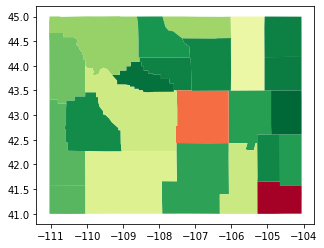

In [10]:
merged = gdf.merge(popdf, right_on='CTYNAME', left_on='NAME')
tokeep = ['NAME', 'geometry', 'COUNTY', 'CTYNAME', 'POPESTIMATE2020']
merged = merged.filter(tokeep)
merged.plot(cmap='RdYlGn_r', column='POPESTIMATE2020')

In [11]:
merged['width'] = 1
merged['height'] = 1
merged['id'] = merged.index
merged = merged.to_crs(3395)

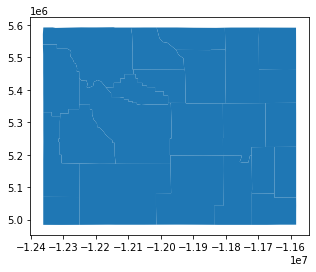

In [12]:
merged.plot()

In [13]:
def gridify(tile):
    polygons = []
    xmin,ymin,xmax,ymax = tile.geometry.bounds
    width = tile.width
    height = tile.height

    stepx = +(xmax - xmin)/(10 * width )
    stepy = -(ymax - ymin)/(10 * height)

    for x in np.arange(xmin, xmax, stepx):
        for y in np.arange(ymax, ymin, stepy):
            poly = [
                (x        , y        ),
                (x + stepx, y        ),
                (x + stepx, y + stepy),
                (x        , y + stepy)
            ]
            polygons.append(Polygon(poly))

    d = {
        'geometry': polygons,
        'tile_idx': tile.id,
        'tile_population': tile.POPESTIMATE2020,
        'tile_width': tile.width,
        'tile_height': tile.height
    }
    
    grids_gdf = gpd.GeoDataFrame(d, crs='EPSG:3395')
    tile_gdf  = gpd.GeoDataFrame(tile.to_frame().T, crs='EPSG:3395')
    grids_gdf = gpd.clip(grids_gdf, tile_gdf)

    return grids_gdf

# For each TILE create the GRIDs
grids_gdf = merged.apply(gridify, axis=1)
grids_gdf = pd.concat(grids_gdf.to_list())
grids_gdf = grids_gdf.reset_index(drop=True).reset_index().rename(columns={'index': 'id'}).to_crs(epsg=3395)

# Change the CRS of TILEs & GRIDs back to their region respective UTM coordinates
tiles_gdf = merged.to_crs(epsg=3395)
grids_gdf = grids_gdf.to_crs(epsg=3395)

grids_gdf.head()

,id,geometry,tile_idx,tile_population,tile_width,tile_height
0,0,"POLYGON ((-11770885.552 5381463.491, -11770885...",0,46676,1,1
1,1,"POLYGON ((-11791975.653 5381463.491, -11791975...",0,46676,1,1
2,2,"POLYGON ((-11781430.602 5381463.491, -11781430...",0,46676,1,1
3,3,"POLYGON ((-11770885.552 5404776.405, -11770885...",0,46676,1,1
4,4,"POLYGON ((-11791975.653 5404776.405, -11791975...",0,46676,1,1


In [14]:
tiles_gdf.describe()

,COUNTY,POPESTIMATE2020,width,height,id
count,23.00000,23.000000,23.0,23.0,23.00000
mean,23.00000,25318.608696,1.0,1.0,11.00000
std,13.56466,24589.077260,0.0,0.0,6.78233
min,1.00000,2275.000000,1.0,1.0,0.00000
25%,12.00000,8583.000000,1.0,1.0,5.50000
50%,23.00000,14711.000000,1.0,1.0,11.00000
75%,34.00000,34906.500000,1.0,1.0,16.50000
max,45.00000,100595.000000,1.0,1.0,22.00000


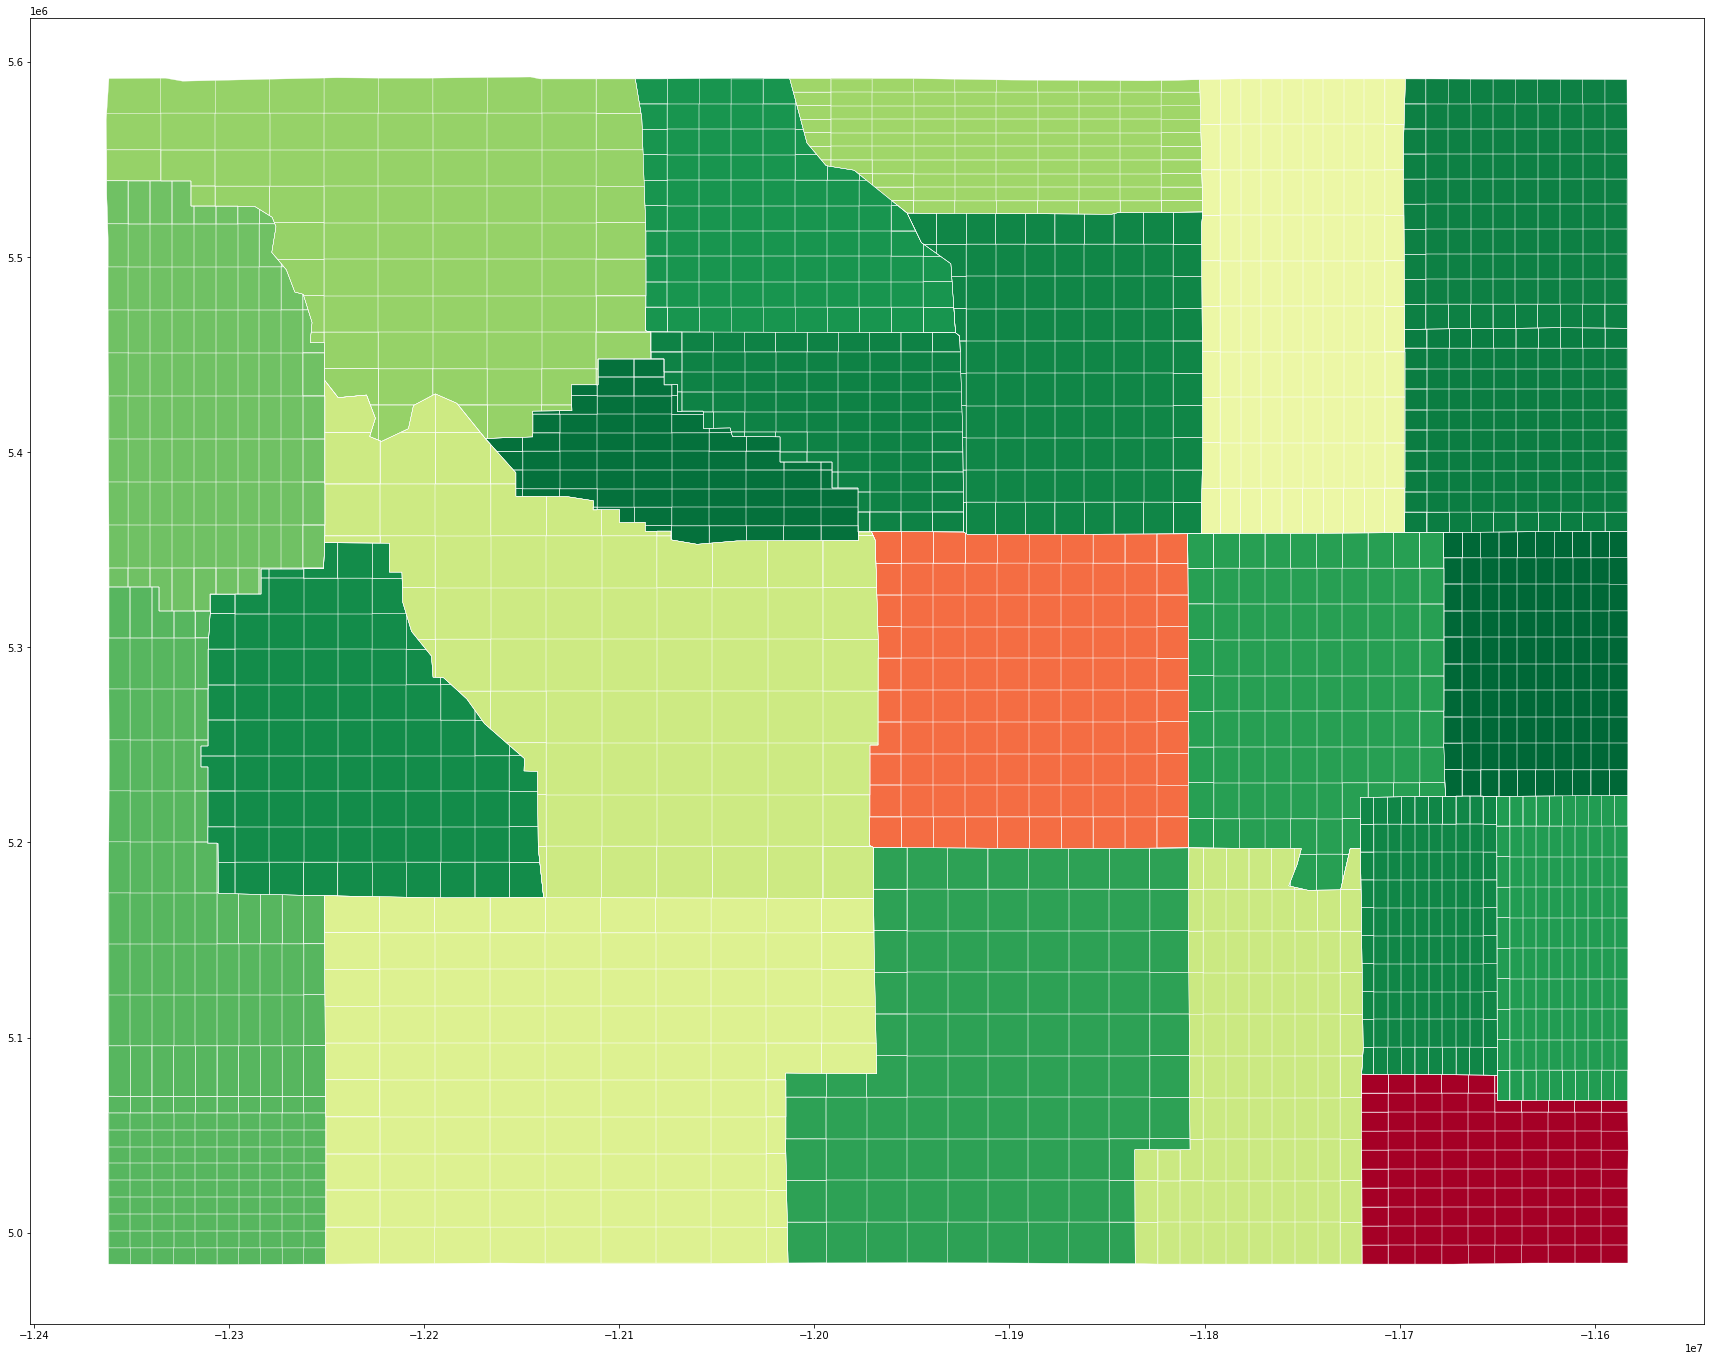

In [28]:
fig,ax = plt.subplots(1,figsize=(30,30))
tiles_gdf.plot(ax=ax, cmap='RdYlGn_r', column='POPESTIMATE2020')
grids_gdf.plot(ax=ax,facecolor="none",edgecolor='white', linewidth=0.3)
# grids_gdf.plot(edgecolor='white',linewidth=0.2, cmap='RdYlGn_r', column='tile_population')

In [16]:
msftgeoj = gpd.read_file('drive/MyDrive/Colab Notebooks/MSFT_Buildings/Wyoming.geojson')

In [17]:
msftgeoj = msftgeoj.to_crs(epsg=3395).assign(
                          centroid=lambda x: x.centroid,
                          building_area=lambda x:x.geometry.area
                          ).rename(
                          columns={'geometry': 'building_count'}
                          ).set_geometry('centroid')

In [18]:
msftgeoj.describe()

,release,building_area
count,386518.000000,386518.000000
mean,1.108921,403.136310
std,0.311541,1107.441808
min,1.000000,8.578463
25%,1.000000,171.819096
50%,1.000000,278.106682
75%,1.000000,428.473850
max,2.000000,303846.155359


In [19]:
grids_gdf.describe()

,id,tile_idx,tile_population,tile_width,tile_height
count,2074.000000,2074.000000,2074.000000,2074.0,2074.0
mean,1036.500000,10.937801,25770.770010,1.0,1.0
std,598.856549,6.560894,24690.212171,0.0,0.0
min,0.000000,0.000000,2275.000000,1.0,1.0
25%,518.250000,5.000000,8578.000000,1.0,1.0
50%,1036.500000,11.000000,14711.000000,1.0,1.0
75%,1554.750000,17.000000,38950.000000,1.0,1.0
max,2073.000000,22.000000,100595.000000,1.0,1.0


In [20]:
def sjoin_polygon_footprints(poly_gdf, footprints_gdf, idx, name, agg):
    poly_gdf = gpd.sjoin(poly_gdf, footprints_gdf, how='left', predicate='intersects')
    poly_gdf = (poly_gdf.groupby(idx)
                        .agg(agg)
                        .reset_index())
    
    poly_gdf = (gpd.GeoDataFrame(poly_gdf, crs=3395)
              .rename(columns={'building_area' : f'{name}_building_area', 
                               'building_count': f'{name}_building_count'}))
    
    return poly_gdf

agg = {
    'geometry'           : 'first',
    'building_area'      : 'sum',
    'building_count'     : 'count',
    'tile_idx'           : 'first',
    'tile_population'    : 'first',
    'tile_width'         : 'first',
    'tile_height'        : 'first'
}

grids_gdf = sjoin_polygon_footprints(grids_gdf, msftgeoj, 'id', 'grid', agg=agg)
grids_gdf.describe()

,id,grid_building_area,grid_building_count,tile_idx,tile_population,tile_width,tile_height
count,2074.000000,2.074000e+03,2074.000000,2074.000000,2074.000000,2074.0,2074.0
mean,1036.500000,7.494846e+04,185.758438,10.937801,25770.770010,1.0,1.0
std,598.856549,4.057040e+05,919.341625,6.560894,24690.212171,0.0,0.0
min,0.000000,0.000000e+00,0.000000,0.000000,2275.000000,1.0,1.0
25%,518.250000,1.517371e+03,7.000000,5.000000,8578.000000,1.0,1.0
50%,1036.500000,7.403526e+03,25.000000,11.000000,14711.000000,1.0,1.0
75%,1554.750000,2.455079e+04,76.000000,17.000000,38950.000000,1.0,1.0
max,2073.000000,9.785825e+06,21200.000000,22.000000,100595.000000,1.0,1.0


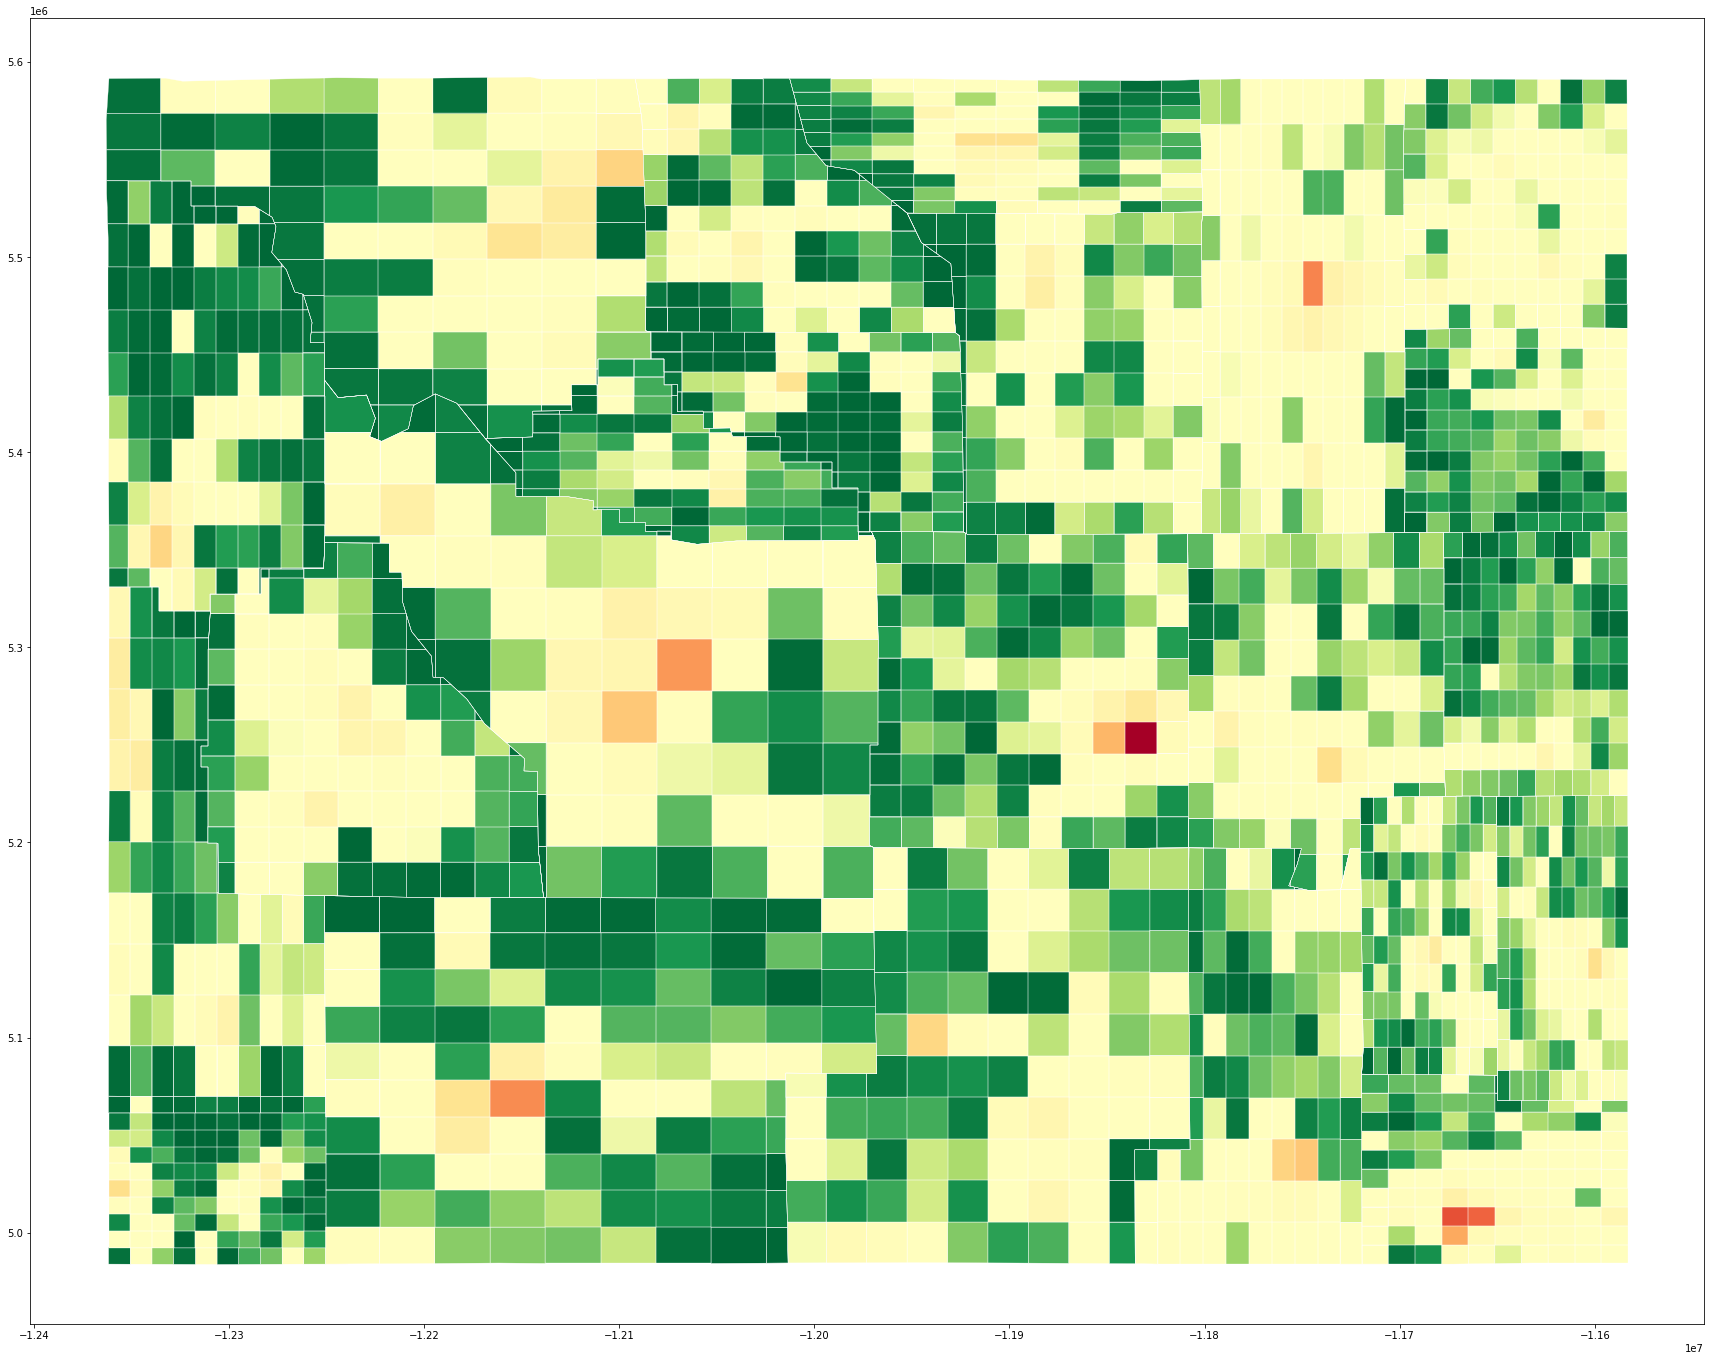

In [36]:
fig,ax = plt.subplots(1,figsize=(30,30))

divnorm = mpl.colors.TwoSlopeNorm(vmin=0, vcenter=45, vmax=21200)
grids_gdf.plot(cmap='RdYlGn_r', column= 'grid_building_count', ax=ax, norm=divnorm)
grids_gdf.plot(ax=ax,facecolor="none",edgecolor='white', linewidth=0.3)

In [22]:
grids_gdf = gpd.sjoin(grids_gdf, merged[['geometry']], how='inner', predicate='intersects').drop(labels='index_right', axis=1)

# Fix the index of the grids
grids_gdf = (grids_gdf.drop(labels='id', axis=1)
                      .reset_index(drop=True).reset_index()
                      .rename(columns={'index': 'id'}))

# Adjust the population accordingly

def recompute_population_by_grids(gp):
    if gp.grid_building_count.sum() <= 1:  gp.tile_population = 0
    return gp.tile_population * (gp.shape[0] / (gp.tile_width * gp.tile_height * 100))

grids_gdf['tile_population'] = (grids_gdf.groupby('tile_idx')
                                         .apply(recompute_population_by_grids)
                                         .values)

In [23]:
grids_gdf[['tile_building_count', 'tile_building_area']] = grids_gdf.groupby('tile_idx')[['grid_building_count', 'grid_building_area']].transform('sum')

# Statistically distribute the TILE population to GRIDs
grids_gdf['grid_population'] = (0.5 * grids_gdf['tile_population'] * (grids_gdf['grid_building_count'] / grids_gdf['tile_building_count']) + 
                                0.5 * grids_gdf['tile_population'] * (grids_gdf['grid_building_area' ] / grids_gdf['tile_building_area' ]))

grids_gdf.loc[:, 'grid_population'] = grids_gdf['grid_population'].fillna(0)

grids_gdf.describe()

,id,grid_building_area,grid_building_count,tile_idx,tile_population,tile_width,tile_height,tile_building_count,tile_building_area,grid_population
count,2781.000000,2.781000e+03,2781.000000,2781.000000,2781.000000,2781.0,2781.0,2781.000000,2.781000e+03,2781.000000
mean,1390.000000,5.923719e+04,148.648688,10.899317,31075.789633,1.0,1.0,18018.301690,7.189722e+06,262.657979
std,802.949874,3.518874e+05,797.959328,6.649331,30263.449330,0.0,0.0,11919.484607,5.101406e+06,1806.848416
min,0.000000,0.000000e+00,0.000000,0.000000,2912.000000,1.0,1.0,4076.000000,1.380256e+06,0.000000
25%,695.000000,1.038656e+03,5.000000,5.000000,11507.920000,1.0,1.0,10618.000000,3.730956e+06,4.598600
50%,1390.000000,6.225451e+03,22.000000,11.000000,18359.320000,1.0,1.0,12766.000000,5.020416e+06,28.310993
75%,2085.000000,1.943696e+04,61.000000,17.000000,44792.500000,1.0,1.0,24953.000000,1.022353e+07,112.461911
max,2780.000000,9.785825e+06,21200.000000,22.000000,116690.200000,1.0,1.0,52587.000000,2.149377e+07,59067.058134


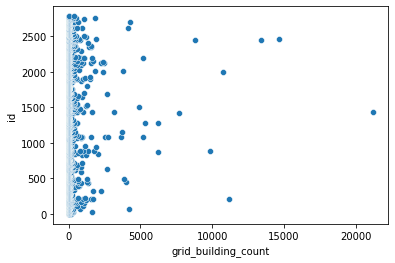

In [24]:
sns.scatterplot(data=grids_gdf, x='grid_building_count',y='id')

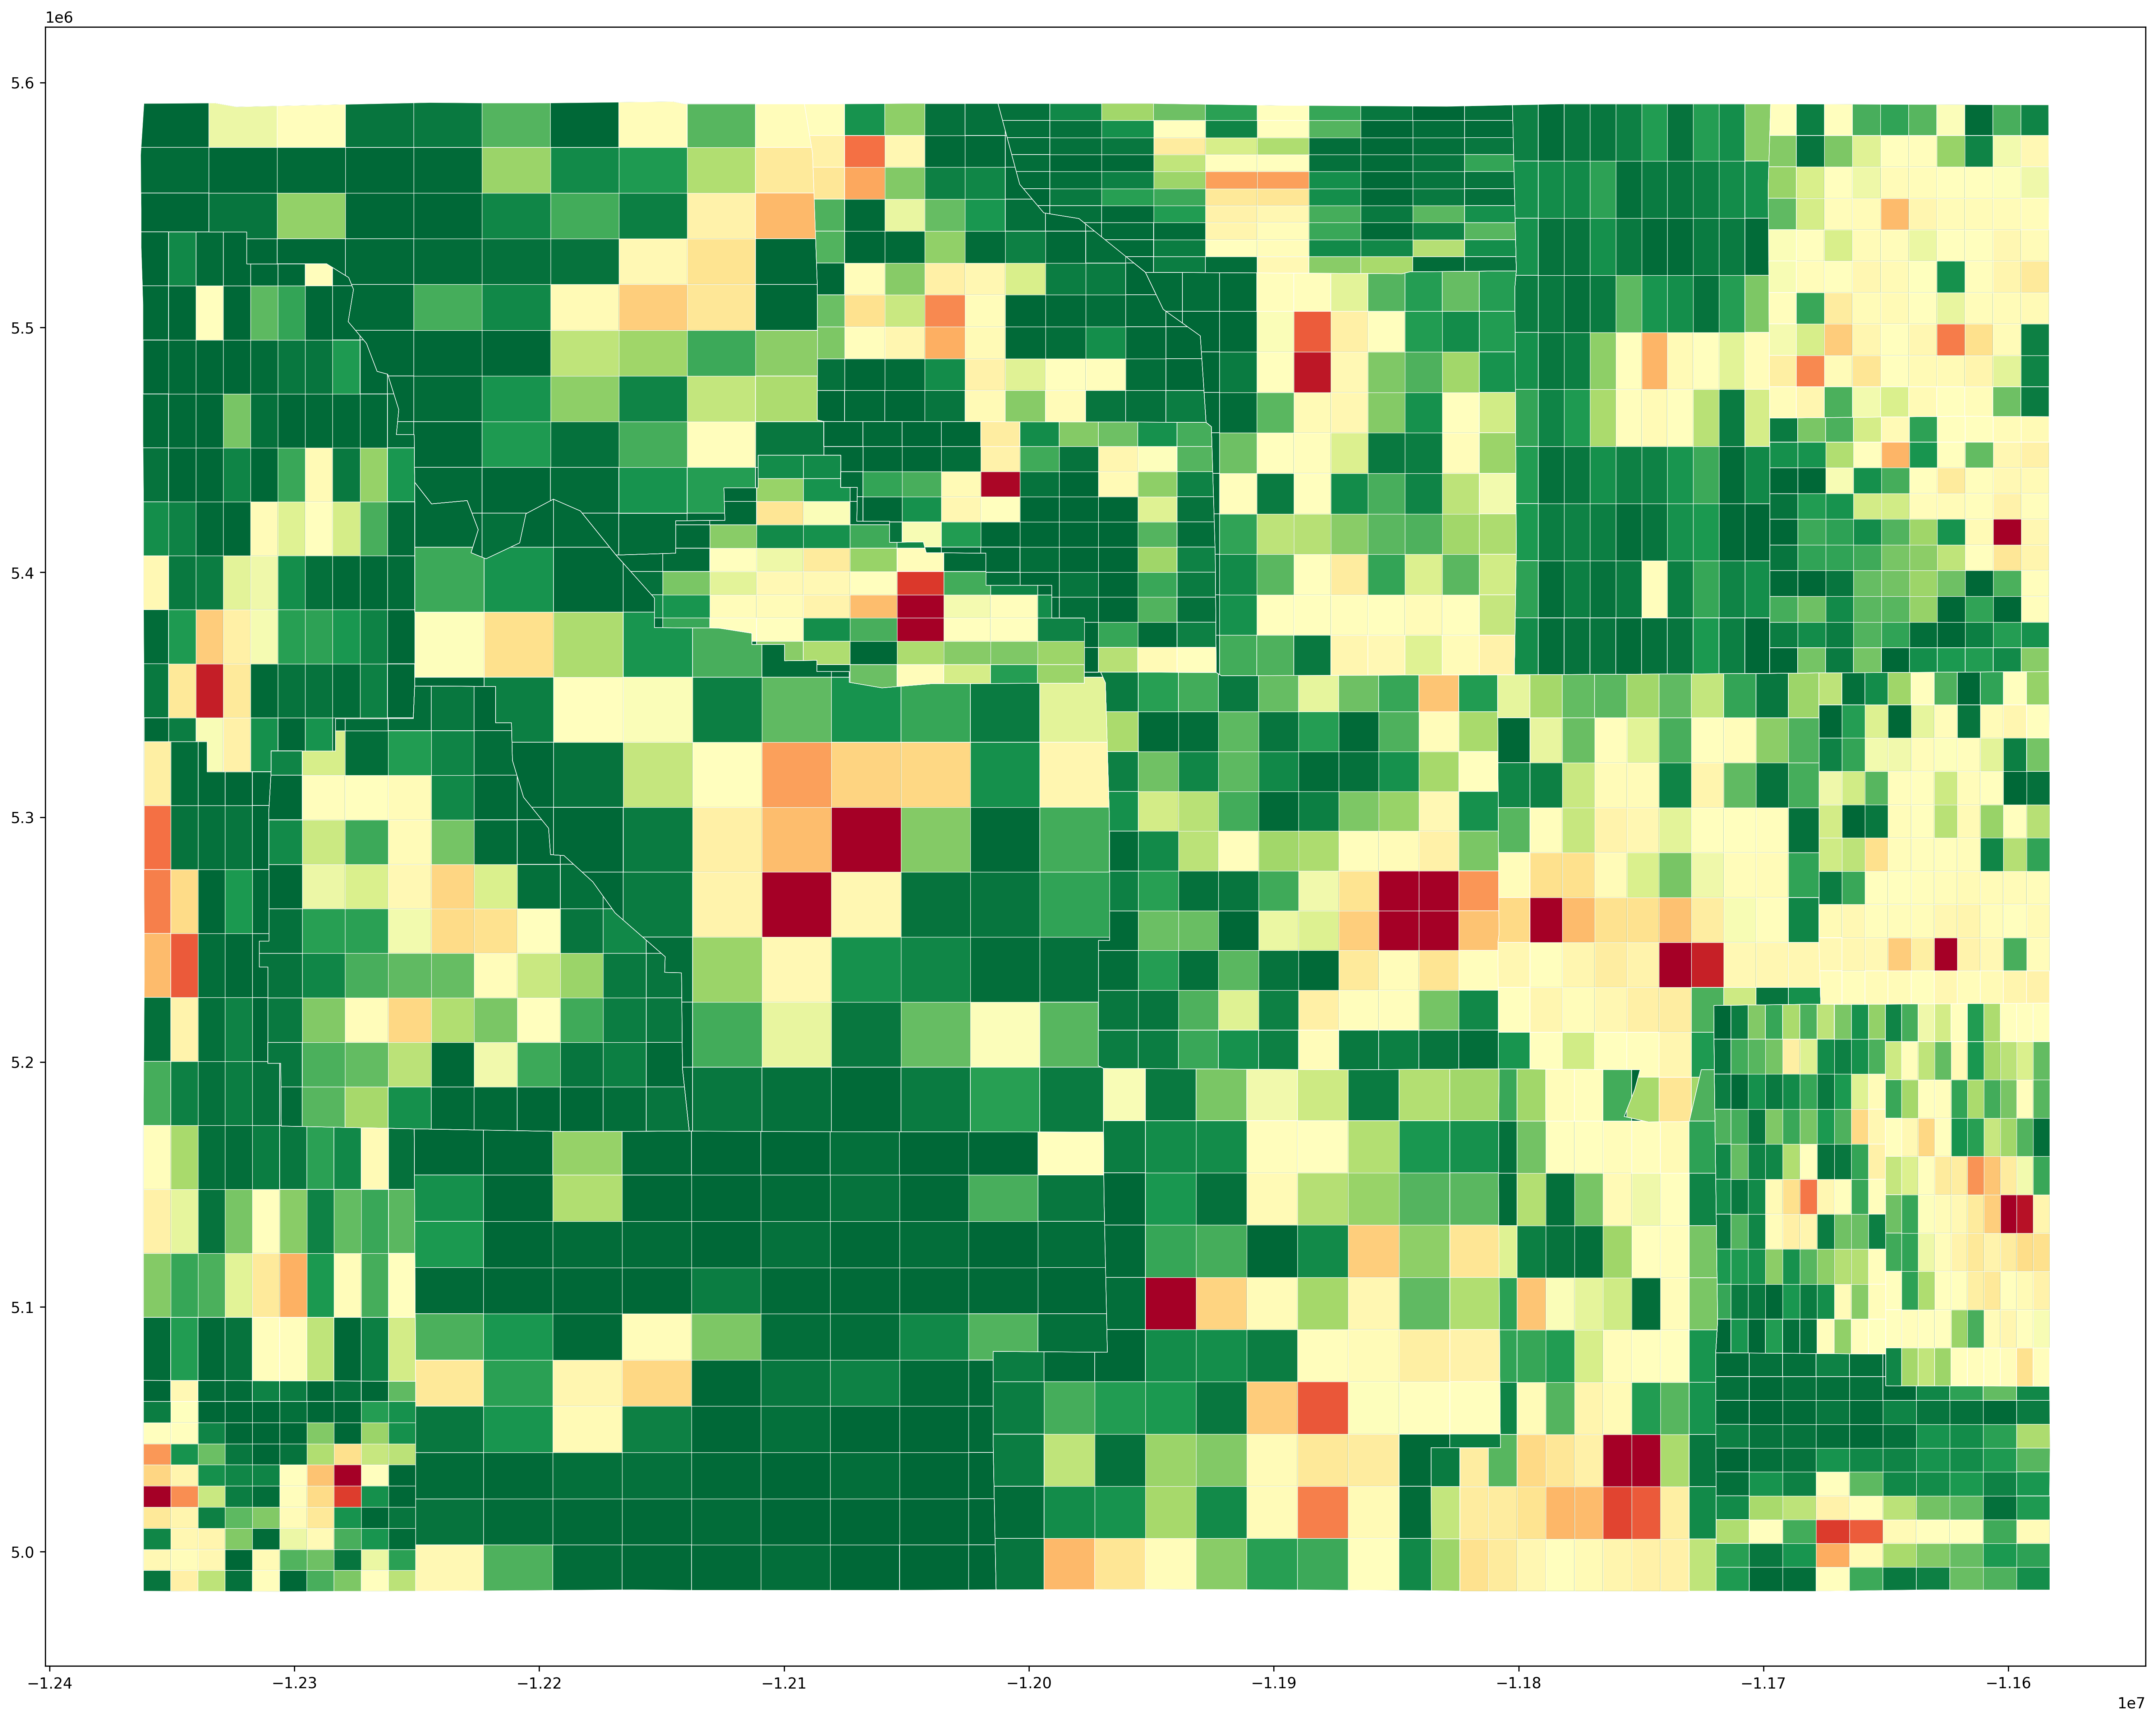

In [34]:
fig, ax = plt.subplots(1, figsize=(40, 40), dpi=300)
fig.subplots_adjust(bottom=0.5)

vmin = grids_gdf.grid_population.min()
vmax = grids_gdf.grid_population.max()

divnorm = mpl.colors.TwoSlopeNorm(vmin=vmin, vcenter=112, vmax=5000)
grids_gdf.plot(cmap='RdYlGn_r', column='grid_population',ax=ax, norm=divnorm,edgecolor='darkgreen', linewidth=0.1)
grids_gdf.plot(ax=ax,facecolor="none",edgecolor='white', linewidth=0.3)

In [26]:
grids_gdf.to_file("wyomingGridded.geojson", driver='GeoJSON')